# About

How to load & visualise datasets with MONAI. Source: https://github.com/Project-MONAI/tutorials/blob/main/modules/load_medical_images.ipynb

In [23]:
from monai import apps, transforms, visualize
import os

In [8]:
import tempfile
import shutil

tmpdir = tempfile.mkdtemp()
print(f"Temporary directory: {tmpdir}")

Temporary directory: /tmp/tmp6d371h7c


# NIFTI images

In [19]:
test_url = "http://www.informatik.uni-leipzig.de/~wiebel/public_data/abdominal_xw/abdominal_xw_t2hastetra2stepmbh3202A.nii.gz"
filename = os.path.join(tmpdir, "abdo.nii.gz")
apps.download_url(test_url, filepath=filename)

abdo.nii.gz: 4.00MB [00:01, 2.14MB/s]                                                                                                                                   

2023-07-05 13:09:26,624 - INFO - Downloaded: /tmp/tmp6d371h7c/abdo.nii.gz
2023-07-05 13:09:26,624 - INFO - Expected md5 is None, skip md5 check for file /tmp/tmp6d371h7c/abdo.nii.gz.


In [21]:
img = transforms.LoadImage(image_only=True, ensure_channel_first=True, simple_keys=True)(filename)
print(f"image data shape: {img.shape}")
print(f"meta data: {img.meta.keys()}")

image data shape: torch.Size([1, 320, 300, 54])
meta data: dict_keys(['sizeof_hdr', 'extents', 'session_error', 'dim_info', 'intent_p1', 'intent_p2', 'intent_p3', 'intent_code', 'datatype', 'bitpix', 'slice_start', 'vox_offset', 'scl_slope', 'scl_inter', 'slice_end', 'slice_code', 'xyzt_units', 'cal_max', 'cal_min', 'slice_duration', 'toffset', 'glmax', 'glmin', 'qform_code', 'sform_code', affine, original_affine, 'as_closest_canonical', spatial_shape, space, original_channel_dim, 'filename_or_obj'])


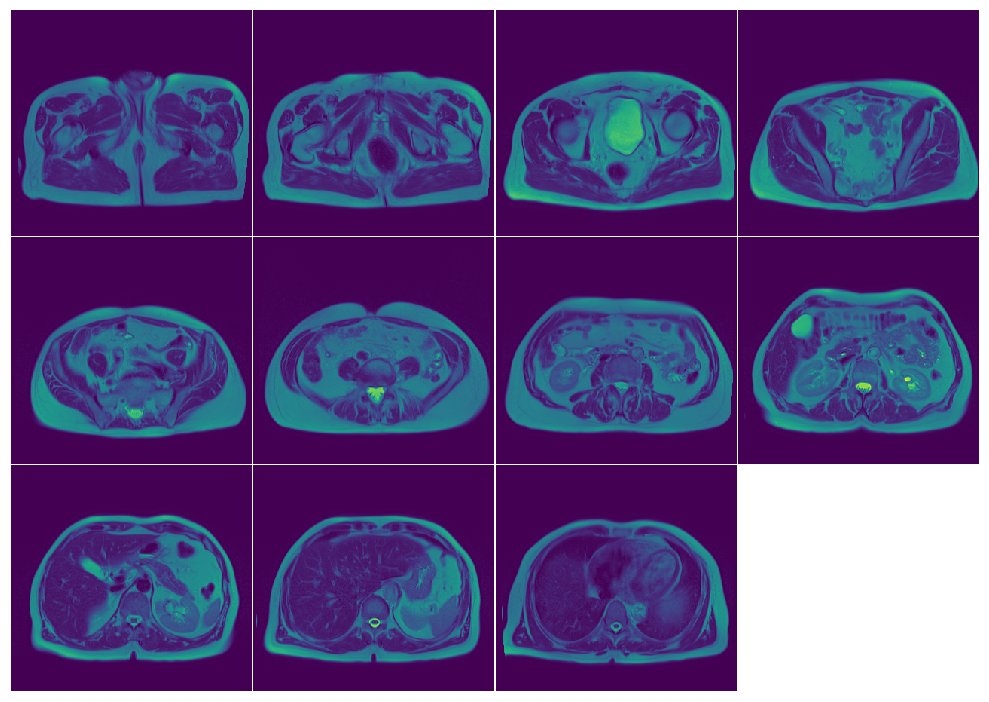

In [40]:
fig = visualize.matshow3d(transforms.Orientation("SPL")(img), every_n=5)

# Cleaning up

In [41]:
shutil.rmtree(tmpdir)